/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


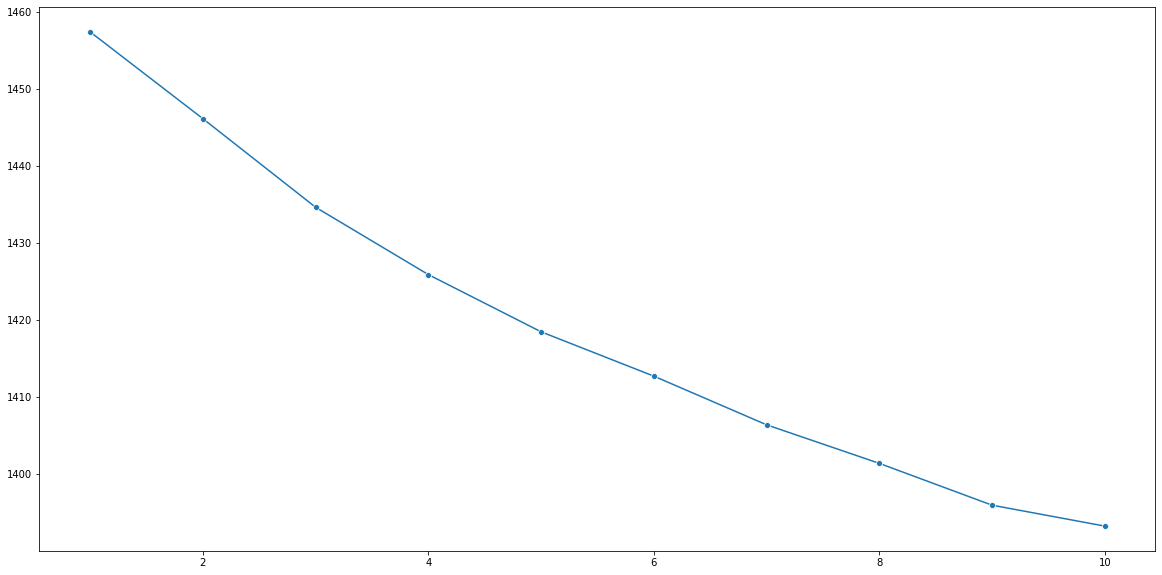

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=1ed85f980c43b531f01a688d3313b377ae680f0fcb412d7856780960e8b3b95d
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


,ArticleId,Text,Cluster_Labels,Entities,Key_Info
0,1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy. prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a green light to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud arguing that auditors did not alert him to any problems. ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief giving only brief answers himself. the prosecution s star witness former worldcom financial chief scott sullivan has said that mr ebbers ordered accounting adjustments at the firm telling him to hit our books . however ms cooper said mr sullivan had not mentioned anything uncomfortable about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004 and is now known as mci. last week mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.,2,"{(mci, ORG), (arthur andersen, PERSON), (6.75bn, MONEY), (2002, DATE), (s, PRODUCT), (2004, DATE), (11bn, MONEY), (5.7bn, MONEY), (new york, GPE), (us, GPE), (scott sullivan, PERSON), (bernie ebbers, PERSON), (last week, DATE), (2001, DATE), (85 years, DATE), (first, ORDINAL), (cynthia cooper, PERSON), (wednesday, DATE), (sullivan, PERSON), (worldcom, ORG), (ebber s, PRODUCT), (ms cooper, ORG), (early 2001 and 2002, DATE), (cooper, PERSON)}","['boss launches defence lawyers defending former worldcom chief bernie ebbers', 'star witness former worldcom financial chief scott sullivan', 'shareholder meetings mr ebbers often passed', 'however ms cooper said mr sullivan', 'meet wall street earnings estimates', 'mr ebbers ordered accounting adjustments', 'mr ebbers could face', 'ms cooper also said', '2001 audit committee meeting', 'internal accounting alerted directors', 'last week mci agreed']"
1,154,german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy. munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up. we re surprised that the ifo index has taken such a knock said dz bank economist bernd weidensteiner. the main reason is probably that the domestic economy is still weak particularly in the retail trade. economy and labour minister wolfgang clement called the dip in february s ifo confidence figure a very mild decline . he said that despite the retreat the index remained at a relatively high level and that he expected a modest economic upswing to continue. germany s economy grew 1.6% last year after shrinking in 2003. however the economy contracted by 0.2% during the last three months of 2004 mainly due to the reluctance of consumers to spend. latest indications are that growth is

In [ ]:
# CLustering , Entity mapping and keywords extraction from the articles

import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',-1)
url='https://raw.githubusercontent.com/zameer0786/Karthik_Zameer/master/BBC%20News%20Train.csv'
df = pd.read_csv(url)
# Dropping the category and performing k-means clustering
df.drop(columns='Category',inplace=True)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
Vect = vectorizer.fit_transform(df['Text'])
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Vect)
    wcss.append(kmeans.inertia_)
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))
sns.lineplot(list(range(1,11)),wcss,marker='o')
plt.show()
kmm = KMeans(6).fit(Vect)
df['Cluster_Labels'] = kmm.labels_
# NAmed entity mapping
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from pprint import pprint

entity=[]
for i in df['Text']:
  doc = nlp(i)
  a=([(X.text, X.label_) for X in doc.ents])
  entity.append(a)
ent=[]
for i in entity:
  res = set(i)
  ent.append(res)
df['Entities'] = ent

# Key information from each article
import nltk
!pip install rake-nltk
from rake_nltk import Rake
r = Rake()
key=[]
for i in df['Text']:
    #Example
    a=r.extract_keywords_from_text(i)
    b=r.get_ranked_phrases()
    c=r.get_ranked_phrases_with_scores()
    key.append(c)
# we calculate the means scores for each article and take the words who have their scores > mean*2

score=[]
avg=[]
for i in key:
    score=[]
    for j in i:
        #print(j[0])
        score.append(j[0])
    avg.append(np.mean(score)*2)
main=[]
for i,j in zip(key,avg):
    filt=[]
    
   
    
    
    for q in range(0,len(i)):
        if(i[q][0]>j):
                
            filt.append((i[q][1]))
    main.append(str(filt))
df['Key_Info'] = main
df


In [ ]:
# TO find  key info from each cluster
clus=[]
for i in range(0,6):
  a = df[df['Cluster_Labels']==i]
  clus.append(a['Text'].values)
key1=[]
for i in clus:
    #Example
    d = str(i)
    a=r.extract_keywords_from_text(d)
    b=r.get_ranked_phrases()
    c=r.get_ranked_phrases_with_scores()
    key1.append(c)
score=[]
avg=[]
for i in key1:
    score=[]
    for j in i:
        #print(j[0])
        score.append(j[0])
    avg.append(np.mean(score))

main1=[]
for i,j in zip(key,avg):
    filt=[]
    
   
    
    
    for q in range(0,len(i)):
        if(i[q][0]>j):
                
            filt.append((i[q][1]))
    main1.append(str(filt))
info = pd.DataFrame({'Category':['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6'],'Cluster_Info':main1})

entity1=[]
for i in info['Cluster_Info']:
  doc = nlp(i)
  a=([(X.text, X.label_) for X in doc.ents])
  entity1.append(a)

ent1=[]
for i in entity1:
  res = set(i)
  ent1.append(res)

info['Entity_Mapping'] = ent1
info

,Category,Cluster_Info,Entity_Mapping
0,Cluster1,"['boss launches defence lawyers defending former worldcom chief bernie ebbers', 'star witness former worldcom financial chief scott sullivan', 'shareholder meetings mr ebbers often passed', 'however ms cooper said mr sullivan', 'meet wall street earnings estimates', 'mr ebbers ordered accounting adjustments', 'mr ebbers could face', 'ms cooper also said', '2001 audit committee meeting', 'internal accounting alerted directors', 'last week mci agreed', 'external auditors arthur andersen', 'finance chief giving', 'mr ebbers orchestrated', 'cynthia cooper worldcom', 'worldcom ordering employees', 'us telecoms giant', 'mr ebbers', 'mentioned anything uncomfortable', 'consulting business told', '11bn (£ 5', 'irregular accounting practices', 'ms cooper']","{(cynthia cooper worldcom', PERSON), (sullivan, PERSON), (mci, ORG), (scott sullivan', PERSON), ('11bn, DATE), (worldcom, ORG), (last week, DATE), (bernie ebbers', PERSON), (arthur andersen', PERSON), (2001, DATE), (ms cooper, PERSON), (cooper, PERSON), ('worldcom ordering employees', WORK_OF_ART)}"
1,Cluster2,"['euro hit record levels making german products less competitive overseas', 'german business confidence slides german business confidence fell', 'knock said dz bank economist bernd weidensteiner', 'confident business sector would signal', 'labour minister wolfgang clement called', 'manufacturing firms including daimlerchrysler siemens', 'based research institute ifo said', 'continuing problems may delay', 'interest rates may rise', 'confidence index fell', 'german domestic demand', 'ifo confidence figure', 'european central bank', 'eurozone interest rates', 'werner sinn said', 'interest rate rise', 'still weak particularly', 'still proving elusive', 'relatively high level', 'kept things going', 'inflation prompting fears', 'ifo president hans', 'cost cutting measures', 'modest economic upswing', 'february knocking hopes', 'economy grew 1', '2004 mainly due']","{(hans, NORP), (research institute ifo, ORG), (wolfgang clement, PERSON), (european central bank', ORG), (werner sinn, PERSON), (ifo, PERSON), (daimlerchrysler siemens', ORG), (german, NORP), (february, DATE), (bernd weidensteiner, PERSON), (1, CARDINAL), (2004, DATE), (dz bank, ORG)}"
2,Cluster3,"['effects said pipa director steven kull', 'bbc poll indicates economic gloom citizens', '3 january 2005 across 22 countries', 'international polling firm globescan together', 'bbc world service poll believe', 'global economic performance says', 'years ago people seem', 'almost 23 000 people', 'growing developing economies china', 'results also may reflect', 'worse place even though', 'rome says one reason', '5 january 2005', 'international policy attitudes', 'blistering economic growth', '22 953 people', 'also quite gloomy', 'huge scale says', 'major metropolitan areas', 'interviews took place', 'going downhill compared', 'endless government propaganda', 'asian tsunami disaster', '4 points depending', '15 november 2004', 'rosy economic future', 'economic conditions improving', '14 countries said', 'seen two decades', 'getting worse compared', 'respondents also said']","{(steven kull, PERSON), (22 953, CARDINAL), ('4, DATE), (14, CARDINAL), (15 november 2004', DATE), (3 january 2005, DATE), (5 january 2005', DATE), (bbc, ORG), (asian, NORP), (one, CARDINAL), (two decades', DATE), (almost 23, CARDINAL), (bbc world service, ORG), (22, CARDINAL), (china, GPE), (rome, GPE)}"
3,Cluster4,"['using technology said dr michael bjorn senior advisor', 'study ericsson interviewed 14 000 mobile phone owners', 'lifestyle governs mobile choice faster better', 'ageing mobile owners encouraged older people', 'dr bjorn said groups dubbed pioneers', 'mobile phone -- especially one equipped', 'almost exactly replacing usage patterns', 'japanese people ericsson questioned use', 'new handset technologies make possible', 'screen size onboard memory', 'text messages also reflects', 'instead phone firm

In [ ]:
# Naming heading of the each article by the highest scored text
nam=[]
for i in range(0,len(key)):
  nam.append(key[i][0][1])
df['Article_Name'] = nam
df

,ArticleId,Text,Cluster_Labels,Entities,Key_Info,Article_Name
0,1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy. prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a green light to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud arguing that auditors did not alert him to any problems. ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief giving only brief answers himself. the prosecution s star witness former worldcom financial chief scott sullivan has said that mr ebbers ordered accounting adjustments at the firm telling him to hit our books . however ms cooper said mr sullivan had not mentioned anything uncomfortable about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004 and is now known as mci. last week mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.,2,"{(mci, ORG), (arthur andersen, PERSON), (6.75bn, MONEY), (2002, DATE), (s, PRODUCT), (2004, DATE), (11bn, MONEY), (5.7bn, MONEY), (new york, GPE), (us, GPE), (scott sullivan, PERSON), (bernie ebbers, PERSON), (last week, DATE), (2001, DATE), (85 years, DATE), (first, ORDINAL), (cynthia cooper, PERSON), (wednesday, DATE), (sullivan, PERSON), (worldcom, ORG), (ebber s, PRODUCT), (ms cooper, ORG), (early 2001 and 2002, DATE), (cooper, PERSON)}","['boss launches defence lawyers defending former worldcom chief bernie ebbers', 'star witness former worldcom financial chief scott sullivan', 'shareholder meetings mr ebbers often passed', 'however ms cooper said mr sullivan', 'meet wall street earnings estimates', 'mr ebbers ordered accounting adjustments', 'mr ebbers could face', 'ms cooper also said', '2001 audit committee meeting', 'internal accounting alerted directors', 'last week mci agreed']",boss launches defence lawyers defending former worldcom chief bernie ebbers
1,154,german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy. munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up. we re surprised that the ifo index has taken such a knock said dz bank economist bernd weidensteiner. the main reason is probably that the domestic economy is still weak particularly in the retail trade. economy and labour minister wolfgang clement called the dip in february s ifo confidence figure a very mild decline . he said that despite the retreat the index remained at a relatively high level and that he expected a modest economic upswing to continue. germany s economy grew 1.6% last year after shrinking in 2003. however the economy contracted by 0.2% during the last three months of 2004 

In [ ]:
#List of names of people who are in more than one article
dup=[]
cou = 0
for i in df['Entities']:
  
  for p in i:
    dup.append(p)
from collections import Counter



d =  Counter(dup)  # -> Counter({4: 3, 6: 2, 3: 1, 2: 1, 5: 1, 7: 1, 8: 1})
rest = [(k,v) for k, v in d.items() if v > 1]

person=[]
for i in rest:
  if(i[0][1]=='PERSON'):
    person.append(i)
per1=[]
for i in person:
  per1.append(i[0][0])
per2=[]
for i in person:
  per2.append(i[1])
person_df = pd.DataFrame({'Name':per1,'Count':per2})
person_df.sort_values(by='Count',ascending=False,inplace=True)
pd.set_option('display.max_rows',None)
person_df 





,Name,Count
37,tony blair,98
36,blair,80
12,michael howard,62
45,don,61
231,gordon brown,55
233,brown,48
11,howard,43
201,charles kennedy,33
475,bush,28
130,chelsea,25


In [ ]:
# Identify the money dealings
key2=[]
for i in range(0,len(df['Text'])):
    #Example
    a=r.extract_keywords_from_text(df['Text'][i])
    b=r.get_ranked_phrases()
    
    key2.append(b)

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english'))
pos=[]
for i in range(0,len(key2)):
  for j in key2[i]:
    # Word tokenizers is used to find the words  
    # and punctuation in a string 
    wordsList = nltk.word_tokenize(j) 
  
    # removing stop words from wordList 
    wordsList = [w for w in wordsList if not w in stop_words]  
  
    #  Using a Tagger. Which is part-of-speech  
    # tagger or POS-tagger.  
    tagged = nltk.pos_tag(wordsList)
    pos.append((i,tagged))
    
    
    
  
    

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#VB verb, base form take
#VBD verb, past tense took
#VBG verb, gerund/present participle taking
#VBN verb, past participle taken
#VBP verb, sing. present, non-3d take
#VBZ verb, 3rd person sing. present takes

In [198]:
mny_vb=[]
for i in range(0,len(pos)):
  for j in range(0,len(pos[i][1])):
    if((pos[i][1][j][1]=='VB')):
      mny_vb.append((pos[i][0],pos[i][1][j][0]))


In [ ]:
mny=[]
for i in range(0,len(pos)):
  for j in range(0,len(pos[i][1])):
    if((pos[i][1][j][1]=='CD')):
      mny.append((pos[i][0],pos[i][1][j][0]))

In [ ]:
mny1=[]
for i in range(0,len(mny)):
  
   a= mny[i][1].replace(' ','')
   mny1.append((mny[i][0],a))


In [ ]:
mny2=[]
for i in range(0,len(mny1)):
  if (mny1[i][1].isalnum() == True):
    mny2.append((mny1[i][0],mny1[i][1]))


In [ ]:
mny3=[]
for i in range(0,len(mny2)):
  if (mny2[i][1].isalpha() == False):
    mny3.append((mny2[i][0],mny2[i][1]))


In [ ]:
mny4=[]
for i in range(0,len(mny3)):
  if (mny3[i][1].isdigit() == False):
    mny4.append((mny3[i][0],mny3[i][1]))

In [199]:
vb_in=[]
vb_nm=[]
for i in mny_vb:
  vb_in.append(i[0])
  vb_nm.append(i[1])

In [200]:
mn_in=[]
mn_nm=[]
for i in mny4:
  mn_in.append(i[0])
  mn_nm.append(i[1])

In [201]:
df1 = pd.DataFrame({'Article':vb_in,'Verb':vb_nm})

In [202]:
df2 = pd.DataFrame({'Article':mn_in,'Money':mn_nm})

In [203]:
df3=pd.merge(df1,df2,on='Article')

In [206]:
df3.shape

(7074, 3)

In [205]:
df3.drop_duplicates(inplace = True) 

In [207]:
df3

,Article,Verb,Money
0,0,face,11bn
1,0,face,7bn
2,0,face,75bn
3,4,include,168m
4,4,include,2001alleging
6,4,include,89m
7,4,include,500m
9,4,include,8m
10,4,include,155m
11,4,include,145m
